In [12]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist=keras.datasets.fashion_mnist
(x_train_full , y_train_full),(x_test,y_test)=fashion_mnist.load_data()
print(x_train_full.shape)
print(x_train_full.dtype)

(60000, 28, 28)
uint8


In [13]:
x_valid,x_train=x_train_full[:5000]/255.0,x_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
class_names=["t-shirt/top","trouser","pullover","dress","coat","sandal","shirt","sneaker","bag","ankle boot"]
class_names[y_train[0]]

'coat'

In [14]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
model.summary()

C:\Users\manig\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6934 - loss: 0.9945 - val_accuracy: 0.8252 - val_loss: 0.5075
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8244 - loss: 0.4990 - val_accuracy: 0.8498 - val_loss: 0.4403
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8426 - loss: 0.4473 - val_accuracy: 0.8530 - val_loss: 0.4281
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8526 - loss: 0.4204 - val_accuracy: 0.8666 - val_loss: 0.3946
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8610 - loss: 0.3962 - val_accuracy: 0.8656 - val_loss: 0.3930
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8676 - loss: 0.3762 - val_accuracy: 0.8642 - val_loss: 0.3868
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8687 - loss: 0.3664 - val_accuracy: 0.8602 - val_loss: 0.4012
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8727 - loss: 0.3572 -

AttributeError: 'function' object has no attribute 'set_ylim'

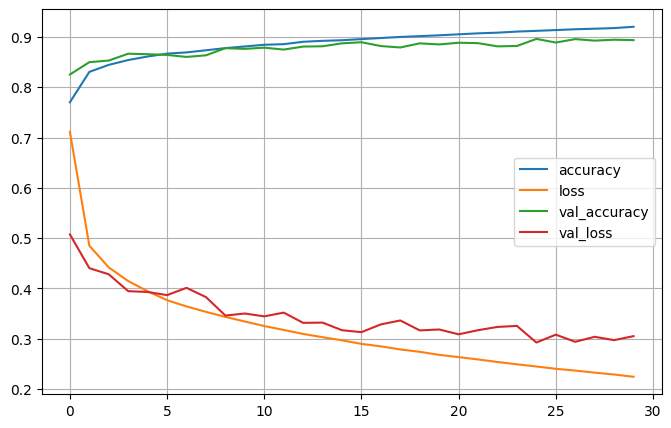

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca.set_ylim(0,1)
plt.show

In [19]:
import numpy as np


model.evaluate(x_test, y_test)

x_new = x_test[:3]

y_prob = model.predict(x_new)
print("Predicted probabilities:\n", y_prob.round(2))

y_pred = np.argmax(y_prob, axis=1)  
print("Predicted class indices:", y_pred)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

predicted_classes = np.array(class_names)[y_pred]
print("Predicted class labels:", predicted_classes)

y_new = y_test[:3]
print("Actual class indices:", y_new)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8516 - loss: 61.7330
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted probabilities:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Predicted class indices: [9 2 1]
Predicted class labels: ['Ankle boot' 'Pullover' 'Trouser']
Actual class indices: [9 2 1]
